In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils.EpochDots import EpochDots
from utils.HistoryPlotter import HistoryPlotter

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

print(tf.__version__)

2.2.0


In [6]:
raw_dataset = pd.read_csv('/Users/theodoretan/.keras/datasets/diabetes-dataset.csv')
dataset = raw_dataset.copy()
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)
print('# training data points:', len(train_data.index), '\n# test data points:', len(test_data.index))

# training data points: 614 
# test data points: 154


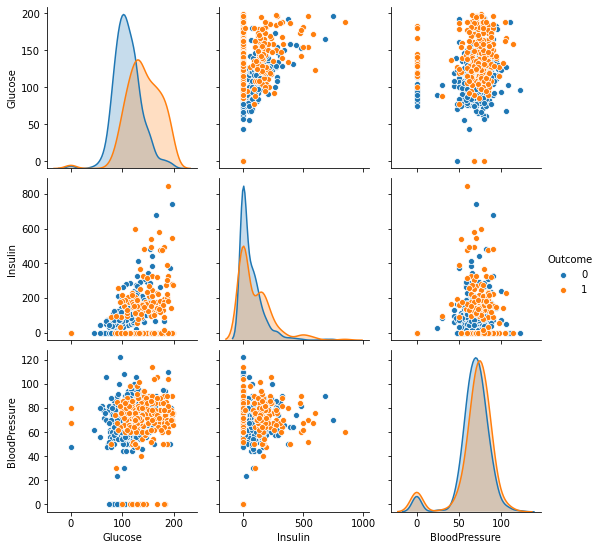

In [15]:
_ = sns.pairplot(train_data[['Outcome', 'Glucose', 'Insulin', 'BloodPressure']], hue='Outcome')

In [16]:
train_labels = train_data.pop('Outcome')
test_labels = test_data.pop('Outcome')
test_labels

9      1
11     1
19     1
23     1
28     0
      ..
746    1
753    1
754    1
759    1
763    0
Name: Outcome, Length: 154, dtype: int64

In [17]:
train_stats = train_data.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.863192,3.382738,0.000,1.00000,3.000,6.00000,17.00
Glucose,614.0,121.636808,32.016768,0.000,100.00000,118.500,140.75000,199.00
BloodPressure,614.0,68.576547,19.911136,0.000,62.00000,72.000,80.00000,122.00
SkinThickness,614.0,20.314332,16.082796,0.000,0.00000,23.000,32.00000,99.00
Insulin,614.0,78.301303,115.537423,0.000,0.00000,7.000,127.75000,846.00
BMI,614.0,32.106678,7.712639,0.000,27.40000,32.150,36.57500,59.40
DiabetesPedigreeFunction,614.0,0.475573,0.329461,0.078,0.24525,0.377,0.63925,2.42
Age,614.0,33.364821,11.593037,21.000,24.00000,29.000,41.00000,72.00


In [19]:
def normalize(data):
    return (data - train_stats['mean']) / train_stats['std']

norm_train_data = normalize(train_data)
norm_test_data = normalize(test_data)
norm_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.688689e-17,1.0,-1.142031,-0.846413,-0.255176,0.631680,3.883484
Glucose,614.0,1.909439e-16,1.0,-3.799160,-0.675796,-0.097974,0.596974,2.416334
BloodPressure,614.0,2.256610e-16,1.0,-3.444130,-0.330295,0.171937,0.573722,2.683094
SkinThickness,614.0,-4.050325e-17,1.0,-1.263109,-1.263109,0.166990,0.726594,4.892536
Insulin,614.0,-6.943414e-17,1.0,-0.677714,-0.677714,-0.617127,0.427989,6.644589
BMI,614.0,-2.430195e-16,1.0,-4.162865,-0.610255,0.005617,0.579351,3.538779
DiabetesPedigreeFunction,614.0,-6.943414e-17,1.0,-1.206738,-0.699091,-0.299196,0.496801,5.901840
Age,614.0,-1.157236e-17,1.0,-1.066573,-0.807797,-0.376504,0.658600,3.332619


In [20]:
# reset the tensorflow graph
tf.keras.backend.clear_session()

In [51]:
def build_model():
    # logistic regression is a single layer neural network with one output
    model = keras.Sequential([
        layers.Dense(1, activation='sigmoid', input_dim=train_data.shape[1]),
    ])

    # binary because 0/1, if multiple then categorical crossentropy is appropriate
    model.compile(
        optimizer='rmsprop', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )

    return model

In [52]:
model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.predict(norm_train_data[:10])

array([[0.7042456 ],
       [0.54654557],
       [0.341304  ],
       [0.35318643],
       [0.09696546],
       [0.33620912],
       [0.7444562 ],
       [0.3795278 ],
       [0.0159909 ],
       [0.697039  ]], dtype=float32)

In [54]:
EPOCHS = 500
history = model.fit(norm_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[EpochDots()])


Epoch: 0, accuracy:0.5804,  loss:0.8204,  val_accuracy:0.5772,  val_loss:0.7872,  
....................................................................................................
Epoch: 100, accuracy:0.7963,  loss:0.4549,  val_accuracy:0.7073,  val_loss:0.5523,  
....................................................................................................
Epoch: 200, accuracy:0.7984,  loss:0.4514,  val_accuracy:0.7073,  val_loss:0.5629,  
....................................................................................................
Epoch: 300, accuracy:0.8004,  loss:0.4513,  val_accuracy:0.6992,  val_loss:0.5649,  
....................................................................................................
Epoch: 400, accuracy:0.7963,  loss:0.4514,  val_accuracy:0.7073,  val_loss:0.5660,  
....................................................................................................

In [57]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
495,0.451352,0.796334,0.567497,0.707317,495
496,0.451353,0.796334,0.567624,0.707317,496
497,0.451366,0.796334,0.567579,0.707317,497
498,0.451345,0.796334,0.567523,0.707317,498
499,0.451318,0.798371,0.567525,0.707317,499


Text(0, 0.5, 'BCE,Accuracy to Diabetes Outcome')

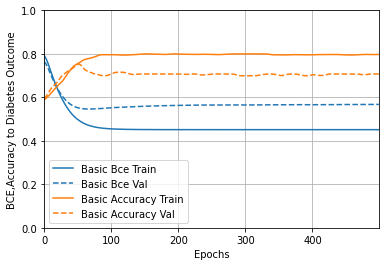

In [59]:
plotter = HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic BCE': history}, metric='loss')
plotter.plot({'Basic Accuracy': history}, metric='accuracy')

plt.ylim([0, 1])
plt.ylabel('BCE,Accuracy to Diabetes Outcome')

In [69]:
# retry with early stopping again
model = build_model()

# patience is num epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# try to fit model again
early_history = model.fit(norm_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, EpochDots()])


Epoch: 0, accuracy:0.4786,  loss:0.9730,  val_accuracy:0.5122,  val_loss:0.8444,  
............................................................................................

Text(0, 0.5, 'BCE,Accuracy to Diabetes Outcome')

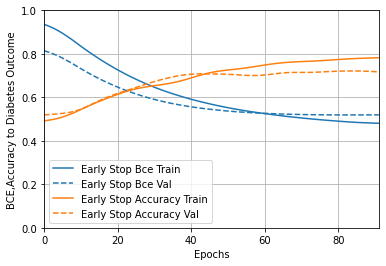

In [70]:
plotter = HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stop BCE': early_history}, metric='loss')
plotter.plot({'Early Stop Accuracy': early_history}, metric='accuracy')

plt.ylim([0, 1])
plt.ylabel('BCE,Accuracy to Diabetes Outcome')

In [71]:
loss, accuracy = model.evaluate(norm_test_data, test_labels, batch_size=1, verbose=1)
print("Testing set accuracy: {:5.2f}%".format(accuracy))

154/154 [==============================] - 0s 624us/step - loss: 0.4960 - accuracy: 0.7727
Testing set accuracy:  0.77%


In [96]:
test_predictions = model.predict(norm_test_data).flatten()
test_labels.reset_index(drop=True, inplace=True)

In [116]:
compare_df = pd.concat([pd.Series(test_predictions, name='Probability'), test_labels], axis=1)

In [117]:
def mark_correct(row):
    return (row['Probability'] >= 0.5 and row['Outcome'] == 1) or (row['Probability'] < 0.5 and row['Outcome'] == 0) 
compare_df['Correct'] = compare_df.apply(lambda row: mark_correct(row), axis=1)

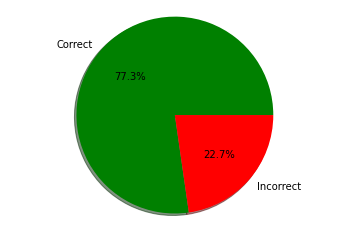

In [127]:
correct, incorrect = compare_df['Correct'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie([correct, incorrect], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', shadow=True, colors=['green', 'red'])
ax1.axis('equal')
plt.show()